In [1]:
"""
@author: mahnoorbaig
@date: 10/20/18
@description: Chicago crime prediction project

@comments: I was learning how to program during this project so the code is messy...

"""
import pandas
import matplotlib.pyplot as plt

# we are creating a visualization of Chicago data by ward
# ward--> how many little rectangles there are

# function ward_count: extract the COUNT of how many UNIQUE instances there with
# the dafaframe(df) with entries in column with column name
def ward_count(df, col, value, unique_id, ward_num):
    '''Returns count of unique_id in df ward_num rows w/entry value in column col'''
    rows = df[ df[col] == value] # boolean slice of rows we want
    if ward_num not in rows['Ward'].values:
        return 0
    grouped = rows.groupby('Ward')
    return grouped[unique_id].count()[ward_num]

# Write a function: make_ward_dictionary 
# (note: function can be written in under 10 lines)
def make_ward_dictionary(df, col, value, unique_id):
    #keys: ward numbers
    dictWard = {}
    # create 50 keys
    for i in range (1,51):
        dictWard [i] = ward_count(df, col, value, unique_id, i)
    
    return dictWard

Text(0.5, 0, 'Ward number mod 5 on the left')

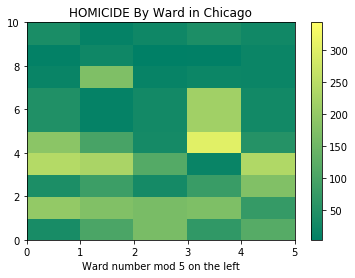

In [3]:
#create a heatmap from a 2D 10x5 list (array)
    #row 0: ward 1-5
    #row2: ward 6-10 
    #etc.
    
#HEATMAP 1: “Plot the counts of at least one primary type of crime by ward. 
#            Choose a type of crime that you consider to be fairly serious.” (Simple)

fileref = open('Crimes_-_2010_to_present.csv', 'r')
ward_df = pandas.read_csv(fileref, low_memory=False)

ward_dictionary = make_ward_dictionary(ward_df, 'Primary Type','HOMICIDE','Case Number')


x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 2, 3, 4, 5, 5, 7, 8, 9, 10]

intensity1 = []
intensity2 = []
intensity3 = []
intensity4 = []
intensity5 = []
intensity6 = []
intensity7 = []
intensity8 = []
intensity9 = []
intensity10 = []

intensity = []


for k in ward_dictionary:
    piece = ward_dictionary[k]
    if (k <= 5):
        intensity1.append(piece)
    if ((k > 5) & (k <= 10)):
        intensity2.append(piece)
    if ((k > 10) & (k <= 15)):
        intensity3.append(piece)
    if ((k > 15) & (k <= 20)):
        intensity4.append(piece)
    if ((k > 20) & (k <= 25)):
        intensity5.append(piece)
    if ((k > 25) & (k <= 30)):
        intensity6.append(piece)
    if ((k > 30) & (k <= 35)):
        intensity7.append(piece)    
    if ((k > 35) & (k <= 40)):
        intensity8.append(piece)
    if ((k > 40) & (k <= 45)):
        intensity9.append(piece)
    if ((k > 45) & (k <= 50)):
        intensity10.append(piece)     
        
intensity.append(intensity1)
intensity.append(intensity2)
intensity.append(intensity3)
intensity.append(intensity4)
intensity.append(intensity5)
intensity.append(intensity6)
intensity.append(intensity7)
intensity.append(intensity8)
intensity.append(intensity9)
intensity.append(intensity10)
   


plt.pcolor(x, y, intensity)
plt.summer()
plt.colorbar()
plt.title("HOMICIDE By Ward in Chicago")
plt.xlabel('Ward number mod 5 on the left')

Text(0.5, 0, 'Ward number mod 5 on the left')

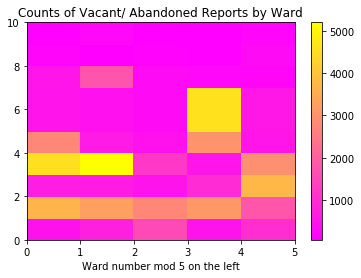

In [4]:
#HEATMAP #2: “Plot either the counts of 'Vacant/Abandoned Building' by ward, 
#              or the counts of graffiti reports by ward (or both).” (Simple)

a_fileref = open('311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv', 'r')
a_ward_df = pandas.read_csv(a_fileref, low_memory=False)

another_ward_dictionary = make_ward_dictionary(a_ward_df, 'SERVICE REQUEST TYPE', 'Vacant/Abandoned Building', 'SERVICE REQUEST NUMBER')

a = [0, 1, 2, 3, 4, 5]
b = [0, 1, 2, 3, 4, 5, 5, 7, 8, 9, 10]

aintensity1 = []
aintensity2 = []
aintensity3 = []
aintensity4 = []
aintensity5 = []
aintensity6 = []
aintensity7 = []
aintensity8 = []
aintensity9 = []
aintensity10 = []

aintensity = []


for k in another_ward_dictionary:
    piece = another_ward_dictionary[k]
    if (k <= 5):
        aintensity1.append(piece)
    if ((k > 5) & (k <= 10)):
        aintensity2.append(piece)
    if ((k > 10) & (k <= 15)):
        aintensity3.append(piece)
    if ((k > 15) & (k <= 20)):
        aintensity4.append(piece)
    if ((k > 20) & (k <= 25)):
        aintensity5.append(piece)
    if ((k > 25) & (k <= 30)):
        aintensity6.append(piece)
    if ((k > 30) & (k <= 35)):
        aintensity7.append(piece)    
    if ((k > 35) & (k <= 40)):
        aintensity8.append(piece)
    if ((k > 40) & (k <= 45)):
        aintensity9.append(piece)
    if ((k > 45) & (k <= 50)):
        aintensity10.append(piece)     
        
aintensity.append(aintensity1)
aintensity.append(aintensity2)
aintensity.append(aintensity3)
aintensity.append(aintensity4)
aintensity.append(aintensity5)
aintensity.append(aintensity6)
aintensity.append(aintensity7)
aintensity.append(aintensity8)
aintensity.append(aintensity9)
aintensity.append(aintensity10)

plt.pcolor(a, b, aintensity)
plt.spring()
plt.colorbar()
plt.title("Counts of Vacant/ Abandoned Reports by Ward")
plt.xlabel('Ward number mod 5 on the left')

Text(0.5, 0, 'Ward number mod 5 on the left')

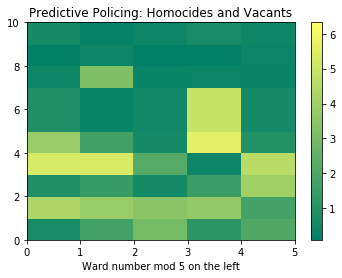

In [5]:
#HEATMAP 3: Complicated


# divide all the original values by the maximum value over all the wards to 
#get a new set of values that will range between 0 and 1
  
aList = list(ward_dictionary.values())
anotherList = list(another_ward_dictionary.values())


#find max # of homocide

maxHomocide = max(aList)



#find max # of vacant

maxVacant = max(anotherList)

#for i in anotherList:
#    if (anotherList[i] > maxVacant):
#        maxVacant = aList[i]
        
#divide all values in ward dict by max homocide

for i in range (len(aList)): 
    aList[i] /= maxHomocide
    aList[i] *= 5
    
#divide all values in another ward dict by max vacant

for i in range (len(anotherList)): 
    anotherList[i] /= maxVacant
    anotherList[i] *= 2
    
    
#combine both data
makeaNewList = []

for i in range (50):
    newNum= aList[i] + anotherList[i]
    makeaNewList.append(newNum)

x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 2, 3, 4, 5, 5, 7, 8, 9, 10]

xintensity1 = []
xintensity2 = []
xintensity3 = []
xintensity4 = []
xintensity5 = []
xintensity6 = []
xintensity7 = []
xintensity8 = []
xintensity9 = []
xintensity10 = []

xintensity = []

for k in range(len(makeaNewList)):
    piece = makeaNewList[k]
    if (k < 5):
        xintensity1.append(piece)
    if ((k >= 5) & (k < 10)):
        xintensity2.append(piece)
    if ((k >= 10) & (k < 15)):
        xintensity3.append(piece)
    if ((k >= 15) & (k < 20)):
        xintensity4.append(piece)
    if ((k >= 20) & (k < 25)):
        xintensity5.append(piece)
    if ((k >= 25) & (k < 30)):
        xintensity6.append(piece)
    if ((k >= 30) & (k < 35)):
        xintensity7.append(piece)    
    if ((k >= 35) & (k < 40)):
        xintensity8.append(piece)
    if ((k >= 40) & (k < 45)):
        xintensity9.append(piece)
    if ((k >= 45) & (k < 50)):
        xintensity10.append(piece) 

xintensity.append(xintensity1)
xintensity.append(xintensity2)
xintensity.append(xintensity3)
xintensity.append(xintensity4)
xintensity.append(xintensity5)
xintensity.append(xintensity6)
xintensity.append(xintensity7)
xintensity.append(xintensity8)
xintensity.append(xintensity9)
xintensity.append(xintensity10)


plt.pcolor(x, y, xintensity)
plt.summer()
plt.colorbar()
plt.title("Predictive Policing: Homocides and Vacants")
plt.xlabel('Ward number mod 5 on the left')